In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

/home/harsh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/harsh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/harsh/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('pima-data.csv')

In [4]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [14]:
mapTarget = {True: 1, False: 0}

In [15]:
data['diabetes'] = data['diabetes'].map(mapTarget)

In [17]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [28]:
X

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912
764,2,122,70,27,0,36.8,0.340,27,1.0638
765,5,121,72,23,112,26.2,0.245,30,0.9062
766,1,126,60,0,0,30.1,0.349,47,0.0000


In [21]:
from sklearn.preprocessing import Imputer

In [22]:
fillValue = Imputer(missing_values = 0, strategy = "mean", axis =0)

In [23]:
X_train  = fillValue.fit_transform(X_train)
X_test = fillValue.fit_transform(X_test)

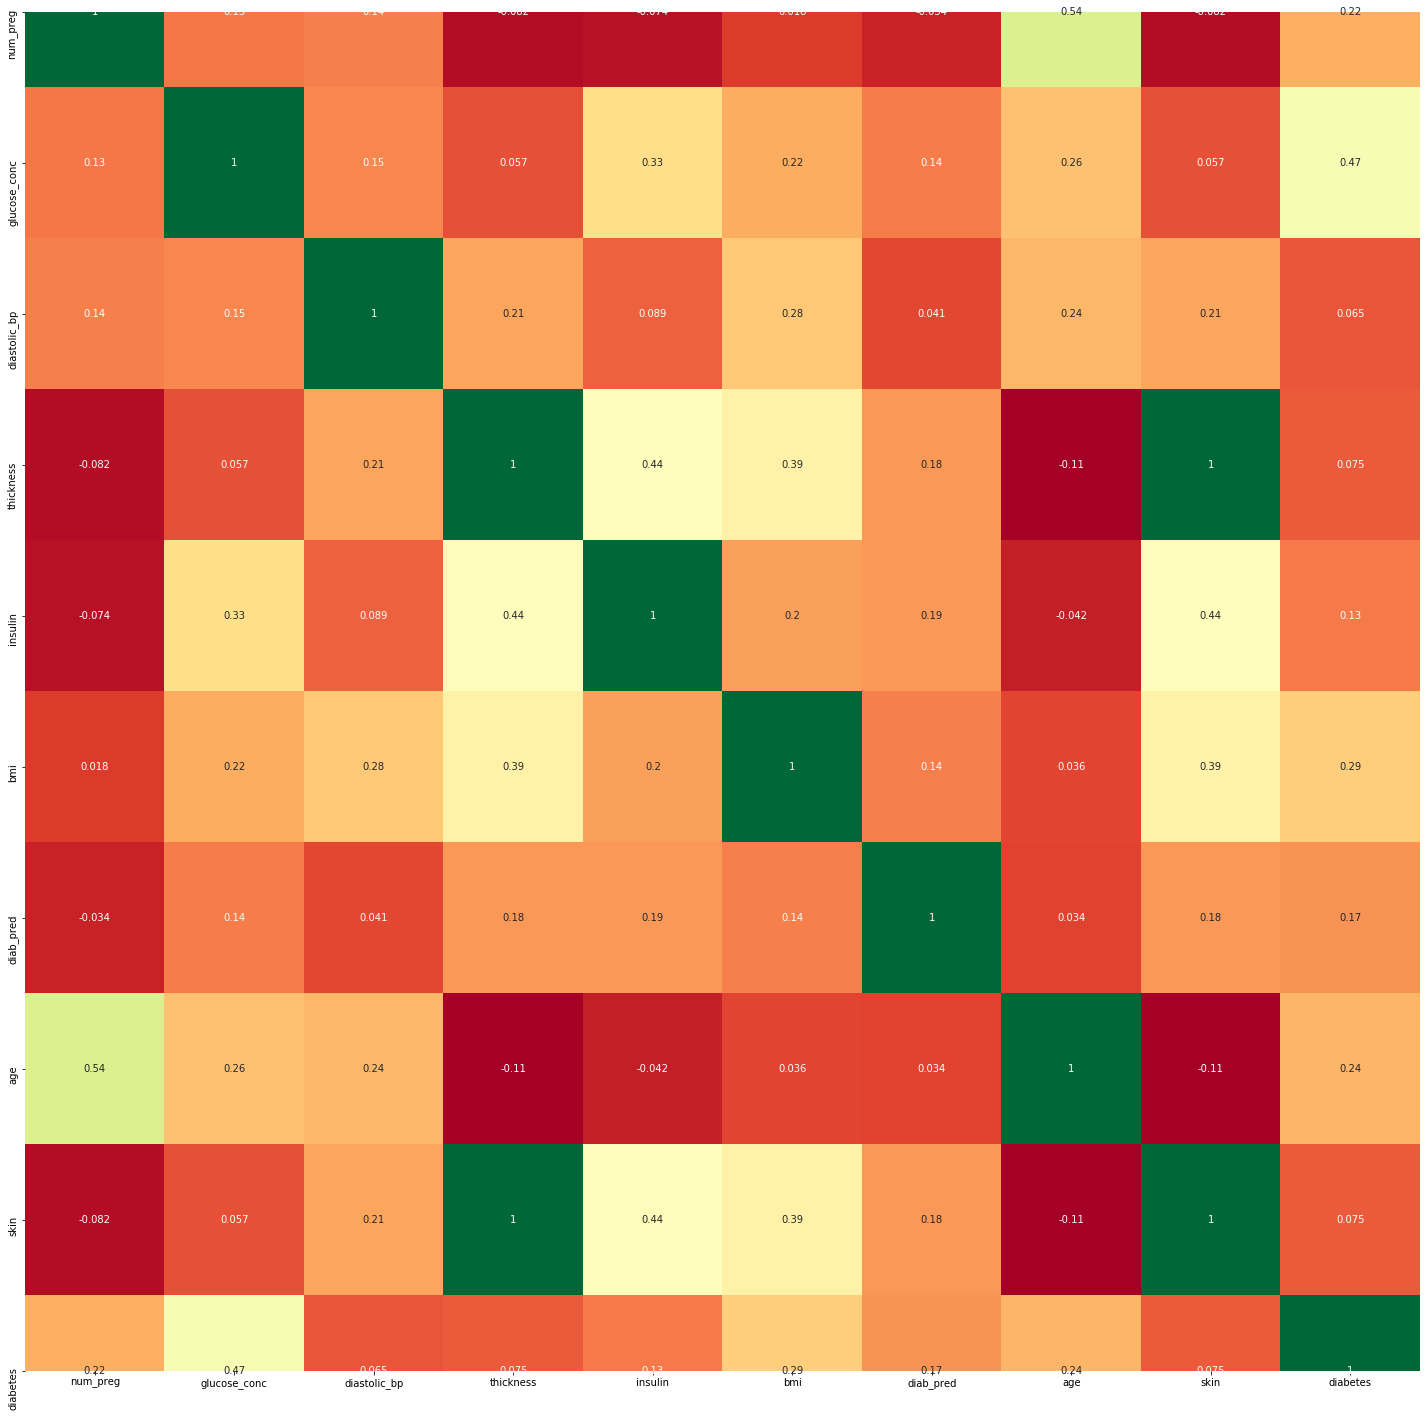

In [25]:
cormat = data.corr()
top_features = cormat.index
plt.figure(figsize=[25,25])
sns.heatmap(data[top_features].corr(), cmap='RdYlGn', annot=True, cbar=False)


In [27]:
X_train

array([[4.53947368e+00, 1.51000000e+02, 9.00000000e+01, ...,
        3.71000000e-01, 2.10000000e+01, 1.81240000e+00],
       [1.00000000e+00, 8.30000000e+01, 6.80000000e+01, ...,
        6.24000000e-01, 2.70000000e+01, 1.15881146e+00],
       [2.00000000e+00, 1.22000000e+02, 7.00000000e+01, ...,
        3.40000000e-01, 2.70000000e+01, 1.06380000e+00],
       ...,
       [4.00000000e+00, 9.40000000e+01, 6.50000000e+01, ...,
        1.48000000e-01, 2.10000000e+01, 8.66800000e-01],
       [1.10000000e+01, 8.50000000e+01, 7.40000000e+01, ...,
        3.00000000e-01, 3.50000000e+01, 1.15881146e+00],
       [5.00000000e+00, 1.36000000e+02, 8.20000000e+01, ...,
        6.40000000e-01, 6.90000000e+01, 1.15881146e+00]])

In [29]:
modelForest = RandomForestClassifier(n_estimators=10)

In [30]:
modelForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = modelForest.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
print(confusion_matrix(y_test, y_pred))

[[141  16]
 [ 39  35]]


In [35]:
print(accuracy_score(y_test, y_pred))

0.7619047619047619


In [46]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import xgboost

In [37]:
param = dict(learning_rate =[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
 min_child_weight = [ 1, 3, 5, 7 ],
 gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ])

In [38]:
modelBoost = xgboost.XGBClassifier()

In [39]:
randomSearch = RandomizedSearchCV(modelBoost, param_distributions=param, n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [40]:
randomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [41]:
randomSearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
modelBoost  =xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
modelBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
y_pred = modelBoost.predict(X_test)

In [45]:
print(accuracy_score(y_test, y_pred))

0.7965367965367965


In [48]:
print(cross_val_score(modelBoost, X, y, cv = 10).mean())

0.740892002734108
